In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from numpy import linalg as LA

In [94]:
new_york = pd.read_csv('data_Coords/newyorkcoords.csv')

In [95]:
new_york

,Unnamed: 0,index,Price,Beds,Baths,Post_Time,Address,City,State,Zipcode,Lat,Long
0,0,4,"$3,375",1 Bed,1 Bath,12m ago,20 Avenue A,New York,NY,10009,40.722721,-73.985637
1,1,6,"$3,600",1 Bed,1 Bath,24m ago,Madison Ave & E 30th St,New York,NY,10016,40.745435,-73.984525
2,2,7,"$3,295",1 Bed,1 Bath,31m ago,Lexington Ave & E 27th St,New York,NY,10016,40.742149,-73.982930
3,3,8,"$3,500",1 Bed,1 Bath,34m ago,York Ave & E 88th St,New York,NY,10128,40.777073,-73.946445
4,4,17,"$4,400",1 Bed,1 Bath,3h ago,160 West 73rd Street,New York,NY,10023,40.778807,-73.980542
...,...,...,...,...,...,...,...,...,...,...,...,...
989,989,1655,"$3,850",1 Bed,1 Bath,5d+ ago,2nd Ave & E 39th St,New York,NY,10016,40.747616,-73.973981
990,990,1656,"$3,995",1 Bed,1 Bath,5d+ ago,2nd Ave & E 57th St,New York,NY,10022,40.759011,-73.965693
991,991,1658,"$2,362",1 Bed,1 Bath,5d+ ago,2324 28th Ave,New York,NY,11102,43.211887,-75.728426
992,992,1663,"$1,500",1 Bed,1 Bath,5d+ ago,Furness Pl,New York,NY,10314,40.584733,-74.151072


In [96]:
def clean_csv(df):        
    df['Price'] = df['Price'].str.replace(',', '')
    df['Price'] = df['Price'].replace({r'\$':''}, regex = True).replace(",", "")
    return df

Text(0, 0.5, 'Longitude')

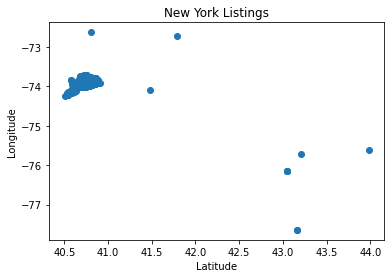

In [97]:
plt.title("New York Listings")
plt.scatter(new_york['Lat'], new_york['Long'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')

## Remove outliers:

As they represent listings outside the city

In [98]:
df = pd.DataFrame(clean_csv(new_york))
df1 = df.loc[df["Lat"] < 41.3]
df1 = df1.loc[df1["Long"] < -73]

Text(0, 0.5, 'Longitude')

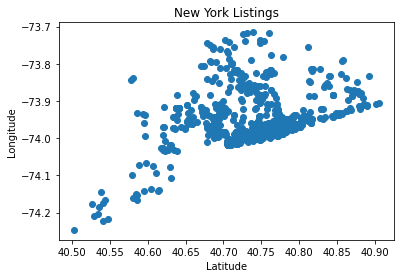

In [99]:
plt.title("New York Listings")
plt.scatter(df1['Lat'], df1['Long'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [100]:
print("Min and Max Latitudes:", min(df1['Lat']), max(df1['Lat']))
print("Min and Max Longitudes:", min(df1['Long']), max(df1['Long']))

Min and Max Latitudes: 40.5031627 40.90450673469174
Min and Max Longitudes: -74.24649027734604 -73.7150497


(array([53., 53., 37., 19., 42., 78., 30., 11., 10., 10., 12.,  9., 10.,
        11., 54., 46., 22., 14., 29., 22., 25., 19., 19., 36., 13., 10.,
        20., 13., 16., 13.,  9., 12., 18., 12., 18., 13., 14., 10., 16.,
        11., 10.,  7.,  9., 10., 12.,  7.,  8.,  8.,  7.,  8.]),
 array([  0.  ,   7.38,  14.76,  22.14,  29.52,  36.9 ,  44.28,  51.66,
         59.04,  66.42,  73.8 ,  81.18,  88.56,  95.94, 103.32, 110.7 ,
        118.08, 125.46, 132.84, 140.22, 147.6 , 154.98, 162.36, 169.74,
        177.12, 184.5 , 191.88, 199.26, 206.64, 214.02, 221.4 , 228.78,
        236.16, 243.54, 250.92, 258.3 , 265.68, 273.06, 280.44, 287.82,
        295.2 , 302.58, 309.96, 317.34, 324.72, 332.1 , 339.48, 346.86,
        354.24, 361.62, 369.  ]),
 <BarContainer object of 50 artists>)

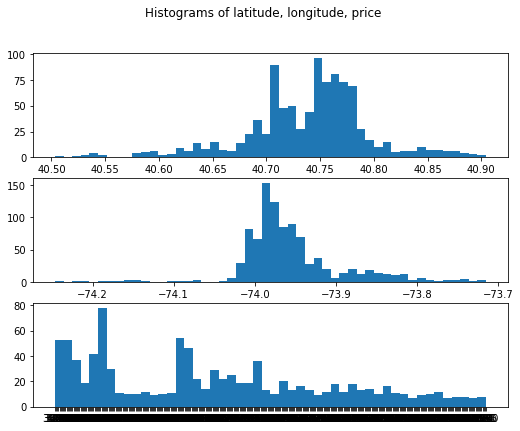

In [101]:

fig, axs = plt.subplots(3)
fig.set_size_inches(8.5, 6.5)
fig.suptitle('Histograms of latitude, longitude, price')
axs[0].hist(df1['Lat'], bins=50)
axs[1].hist(df1['Long'], bins = 50)
axs[2].hist(df1['Price'], bins = 50)

In [102]:
lat_norm = (preprocessing.normalize([df1['Lat']])).flatten()
long_norm = (preprocessing.normalize([df1['Long']])).flatten()
price_norm = (preprocessing.normalize([df1['Price']])).flatten()

# lat_norm = df1['Lat'] - 40
# long_norm = df1['Long'] + 75
# price = df1['Price']

#df_norm = pd.DataFrame(Latitude = lat_norm)

df_norm = pd.DataFrame(data={"latitude": lat_norm, "longitude": long_norm, "price": price_norm})

df_norm

,latitude,longitude,price
0,0.032013,-0.032039,0.028241
1,0.032031,-0.032038,0.030124
2,0.032028,-0.032037,0.027572
3,0.032056,-0.032022,0.029287
4,0.032057,-0.032036,0.036818
...,...,...,...
970,0.031986,-0.032028,0.030082
971,0.032033,-0.032033,0.032216
972,0.032041,-0.032030,0.033429
973,0.031904,-0.032110,0.012552


(array([ 6.,  6., 13., 39., 57., 47., 50., 43., 51., 34., 43., 40., 55.,
        42., 42., 37., 59., 27., 39., 30., 26., 32., 25., 16., 13., 26.,
        16., 16.,  6.,  1.,  6.,  6.,  4.,  4.,  1.,  1.,  1.,  6.,  0.,
         2.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([0.00836779, 0.0098735 , 0.0113792 , 0.0128849 , 0.0143906 ,
        0.0158963 , 0.017402  , 0.0189077 , 0.0204134 , 0.0219191 ,
        0.0234248 , 0.0249305 , 0.02643621, 0.02794191, 0.02944761,
        0.03095331, 0.03245901, 0.03396471, 0.03547041, 0.03697611,
        0.03848181, 0.03998751, 0.04149321, 0.04299891, 0.04450462,
        0.04601032, 0.04751602, 0.04902172, 0.05052742, 0.05203312,
        0.05353882, 0.05504452, 0.05655022, 0.05805592, 0.05956162,
        0.06106733, 0.06257303, 0.06407873, 0.06558443, 0.06709013,
        0.06859583, 0.07010153, 0.07160723, 0.07311293, 0.07461863,
        0.07612433, 0.07763004, 0.07913574, 0.08064144, 0.08214714,
        0.08365284]),
 <BarContainer

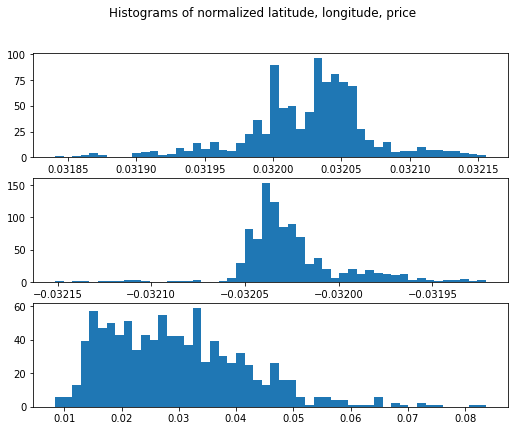

In [103]:

fig, axs = plt.subplots(3)
fig.set_size_inches(8.5, 6.5)
fig.suptitle('Histograms of normalized latitude, longitude, price')
axs[0].hist(df_norm['latitude'], bins=50)
axs[1].hist(df_norm['longitude'], bins = 50)
axs[2].hist(df_norm['price'], bins = 50)

In [104]:
LA.norm(df_norm['latitude'])

0.9999999999999998

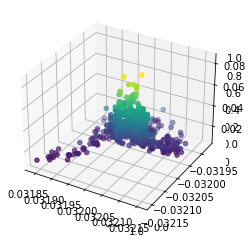

In [105]:

%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')



# Data for three-dimensional scattered points
zdata = price_norm
xdata = lat_norm
ydata = long_norm
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');

<AxesSubplot:>

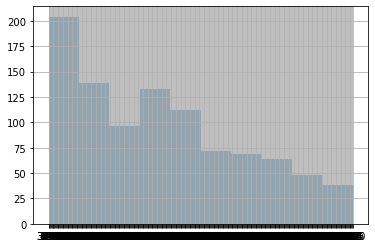

In [106]:
df1["Price"].hist(bins=10)

In [107]:
df1

,Unnamed: 0,index,Price,Beds,Baths,Post_Time,Address,City,State,Zipcode,Lat,Long
0,0,4,3375,1 Bed,1 Bath,12m ago,20 Avenue A,New York,NY,10009,40.722721,-73.985637
1,1,6,3600,1 Bed,1 Bath,24m ago,Madison Ave & E 30th St,New York,NY,10016,40.745435,-73.984525
2,2,7,3295,1 Bed,1 Bath,31m ago,Lexington Ave & E 27th St,New York,NY,10016,40.742149,-73.982930
3,3,8,3500,1 Bed,1 Bath,34m ago,York Ave & E 88th St,New York,NY,10128,40.777073,-73.946445
4,4,17,4400,1 Bed,1 Bath,3h ago,160 West 73rd Street,New York,NY,10023,40.778807,-73.980542
...,...,...,...,...,...,...,...,...,...,...,...,...
988,988,1651,3595,1 Bed,1 Bath,5d+ ago,81 Clifton Pl,New York,NY,11238,40.688274,-73.960743
989,989,1655,3850,1 Bed,1 Bath,5d+ ago,2nd Ave & E 39th St,New York,NY,10016,40.747616,-73.973981
990,990,1656,3995,1 Bed,1 Bath,5d+ ago,2nd Ave & E 57th St,New York,NY,10022,40.759011,-73.965693
992,992,1663,1500,1 Bed,1 Bath,5d+ ago,Furness Pl,New York,NY,10314,40.584733,-74.151072


In [108]:
correlation_matrix = df1.corr()


## The Problem:

Can we predict the Price of a 1 Bedroom, 1 Bathroom in New York in a given Coordinate

We will make two models:

- 1: A Normal 3D Linear Regression with Scipy
- 2: A ML 3D Regression with Sci-kit learn

In [109]:
X = df1[['Lat', 'Long']].copy()
y = df1[['Price']].copy()

In [110]:
X

,Lat,Long
0,40.722721,-73.985637
1,40.745435,-73.984525
2,40.742149,-73.982930
3,40.777073,-73.946445
4,40.778807,-73.980542
...,...,...
988,40.688274,-73.960743
989,40.747616,-73.973981
990,40.759011,-73.965693
992,40.584733,-74.151072


In [111]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [112]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 houses:
         Lat       Long
0  40.722721 -73.985637
1  40.745435 -73.984525
2  40.742149 -73.982930
3  40.777073 -73.946445
4  40.778807 -73.980542
The predictions are
[3316.66666667 3600.         3295.         3500.         4200.        ]


In [113]:
print(y.head())

  Price
0  3375
1  3600
2  3295
3  3500
4  4400


In [114]:
X_train, X_test, y_train, y_test = train_test_split(df1[['Lat', 'Long']], df1['Price'], test_size=0.2)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error and mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("RMSE: ", np.sqrt(mse))

Mean Absolute Error:  951.4580586331293
Mean Squared Error:  1500833.3002280497
RMSE:  1225.0850175510473


In [116]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error and mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("RMSE: ", np.sqrt(mse))

Mean Absolute Error:  713.1261538461537
Mean Squared Error:  1194876.214329714
RMSE:  1093.103935739742


In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_norm[['latitude', 'longitude']], df_norm['price'], test_size=0.2)

# Train the Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error and  mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Normalized Mean Absolute Error: ", mae)
print("Normailzed Mean Squared Error: ", mse)
print("Normalized RMSE: ", np.sqrt(mse))

Normalized Mean Absolute Error:  0.0056689966019269926
Normailzed Mean Squared Error:  7.13137596189769e-05
Normalized RMSE:  0.008444747457383016


In [117]:
min_alt = min(df1['Lat'])
max_alt = max(df1['Lat'])
min_long = min(df1['Long'])
max_long = max(df1['Long'])
print(min_alt, max_alt, min_long, max_long)

40.5031627 40.90450673469174 -74.24649027734604 -73.7150497


In [118]:
y_pred

array([4130.        , 4775.        , 3495.        , 1350.        ,
       4296.875     , 2099.        , 2000.        , 5130.        ,
       1900.        , 4400.        , 2895.        , 3195.        ,
       1450.        , 2350.        , 4995.71428571, 7730.        ,
       5925.        , 2600.        , 1350.        , 3400.        ,
       7730.        , 3400.        , 3895.        , 2613.        ,
       2300.        , 4802.5       , 2550.        , 4900.        ,
       4148.33333333, 3925.        , 2900.        , 1350.        ,
       2700.        , 3200.        , 1700.        , 3632.85714286,
       3300.        , 1500.        , 1800.        , 1600.        ,
       2325.        , 1750.        , 3350.        , 3250.        ,
       2100.        , 4827.33333333, 1400.        , 2550.        ,
       2997.5       , 4800.        , 2595.        , 3900.        ,
       2200.        , 3550.        , 7750.        , 5788.        ,
       3850.        , 3350.        , 4200.        , 5950.     

In [119]:
X_test

,Lat,Long
937,40.774797,-73.978073
394,40.745689,-74.001022
322,40.792448,-73.964285
483,40.695373,-73.811524
728,40.752634,-73.965140
...,...,...
438,40.775532,-73.952782
699,40.747200,-73.987514
636,40.657889,-73.960975
540,40.735834,-73.789320


In [490]:
# i = min_alt
# j = min_long
# no_coords = ((max_alt-i)*(max_long-min_long))
# no_coords = 100


# df_pred = pd.DataFrame(np.empty([no_coords, 3], dtype=str), columns =['Lat', 'Long','Price'])
# k = 0
# l = 0
# while (k < no_coords and i < max_alt and j < max_long):
#     df_pred.iloc[k, 0] = i
#     df_pred.iloc[k, 1] = j
#     i += 0.0035
#     j += 0.0035
#     k += 1


df_pred = pd.DataFrame(np.zeros([300, 2], dtype=str), columns =['Lat', 'Long'])

k = min_alt
l = min_long

index = 0
for i in range(30):
    k = min_alt
    for j in range(15):
        #print(l*k)
        if (l >= -1*(k+33.6)):
         #   print('REEE')
            df_pred.iloc[index,0] = k
            df_pred.iloc[index,1] = l
            k += 0.018
            index += 1
    l += 0.015
    

In [491]:

print(min_long)

print(min_long*0.8237 + 101.716042)
print(min_alt)

df_pred

-74.24649027734604
40.55920795855007
40.5031627


,Lat,Long
0,40.503163,-74.09649
1,40.521163,-74.09649
2,40.539163,-74.09649
3,40.557163,-74.09649
4,40.575163,-74.09649
...,...,...
295,40.683163,-73.81149
296,40.701163,-73.81149
297,40.719163,-73.81149
298,40.737163,-73.81149


In [492]:
df_pred.iloc[[300]]


IndexError: positional indexers are out-of-bounds

In [493]:
X_test = df_pred[['Lat', 'Long']]
y_pred = model.predict(X_test)
X_test

,Lat,Long
0,40.503163,-74.09649
1,40.521163,-74.09649
2,40.539163,-74.09649
3,40.557163,-74.09649
4,40.575163,-74.09649
...,...,...
295,40.683163,-73.81149
296,40.701163,-73.81149
297,40.719163,-73.81149
298,40.737163,-73.81149


In [494]:
y_pred

array([1350.        , 1350.        , 1350.        , 1350.        ,
       1350.        , 1500.        , 1850.        , 1650.        ,
       3400.        , 2800.        , 2950.        , 3279.16666667,
       5000.        , 5000.        , 5000.        , 1350.        ,
       1350.        , 1350.        , 1350.        , 1350.        ,
       1500.        , 1850.        , 1650.        , 3400.        ,
       2800.        , 2950.        , 3279.16666667, 5000.        ,
       5000.        , 5000.        , 1350.        , 1350.        ,
       1350.        , 1350.        , 1350.        , 1550.        ,
       1850.        , 1650.        , 3400.        , 2800.        ,
       2950.        , 3279.16666667, 5000.        , 5000.        ,
       5000.        , 1350.        , 1350.        , 1350.        ,
       1350.        , 1350.        , 1550.        , 2350.        ,
       1650.        , 3400.        , 2800.        , 2950.        ,
       3279.16666667, 5000.        , 5000.        , 5000.     

In [495]:
df_final = df_pred.assign(Price = y_pred)

In [496]:
df_final

,Lat,Long,Price
0,40.503163,-74.09649,1350.0
1,40.521163,-74.09649,1350.0
2,40.539163,-74.09649,1350.0
3,40.557163,-74.09649,1350.0
4,40.575163,-74.09649,1350.0
...,...,...,...
295,40.683163,-73.81149,2800.0
296,40.701163,-73.81149,1875.0
297,40.719163,-73.81149,2000.0
298,40.737163,-73.81149,1880.0


(array([ 4., 55.,  8., 28., 39., 16., 25., 11., 10.,  2., 15., 19.,  0.,
        12., 11.,  1.,  2., 12.,  2.,  1.,  1.,  2.,  0.,  2.,  0., 18.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1100., 1256., 1412., 1568., 1724., 1880., 2036., 2192., 2348.,
        2504., 2660., 2816., 2972., 3128., 3284., 3440., 3596., 3752.,
        3908., 4064., 4220., 4376., 4532., 4688., 4844., 5000., 5156.,
        5312., 5468., 5624., 5780., 5936., 6092., 6248., 6404., 6560.,
        6716., 6872., 7028., 7184., 7340., 7496., 7652., 7808., 7964.,
        8120., 8276., 8432., 8588., 8744., 8900.]),
 <BarContainer object of 50 artists>)

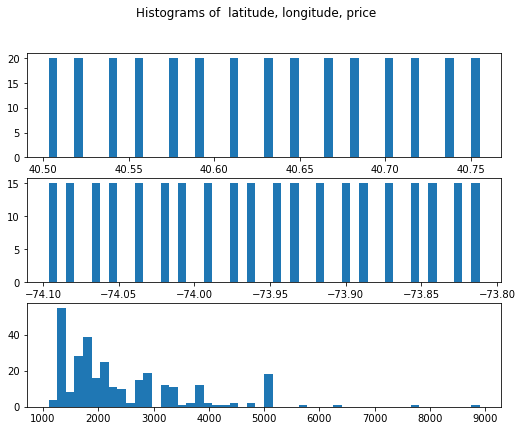

In [497]:

fig, axs = plt.subplots(3)
fig.set_size_inches(8.5, 6.5)
fig.suptitle('Histograms of  latitude, longitude, price')
axs[0].hist(df_final['Lat'], bins=50)
axs[1].hist(df_final['Long'], bins = 50)
axs[2].hist(df_final['Price'], bins = 50)

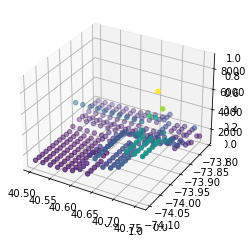

In [498]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')



# Data for three-dimensional scattered points
zdata = df_final['Price']
xdata = df_final['Lat']
ydata = df_final['Long']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');

In [499]:
df_final

,Lat,Long,Price
0,40.503163,-74.09649,1350.0
1,40.521163,-74.09649,1350.0
2,40.539163,-74.09649,1350.0
3,40.557163,-74.09649,1350.0
4,40.575163,-74.09649,1350.0
...,...,...,...
295,40.683163,-73.81149,2800.0
296,40.701163,-73.81149,1875.0
297,40.719163,-73.81149,2000.0
298,40.737163,-73.81149,1880.0


In [500]:
df_final.to_csv('new-york_coordsPred.csv')

In [437]:
arr1 = np.zeros([5,5])
arr2 = np.zeros([5,5])
arr

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [438]:
k = 0
l = 4

for i in range(5):
    k = 0
    for j in range(5):
        arr1[i][j] = k
        arr2[i][j] = l
        k += 1
    l -= 1

In [304]:
arr1

array([[0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.],
       [0., 1., 2., 3., 4.]])

In [305]:
arr2

array([[4., 4., 4., 4., 4.],
       [3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])